# Régression Logistique avec Gradient Descent et Dataset mails
Objectif c'est de classifier les emails (<b>spam</b> ou <b>non spam</b>)

In [66]:
import pandas as pd #Importer les Dataset
import numpy as np #Manipuler le Dataset comme matrice
import matplotlib.pyplot as plt #Visualiser Lesdonnées

In [67]:
df = pd.read_csv('mails.csv',delimiter=",")
df.head()

,fautes d'orthographe,nbr des mots-clés déclencheurs,Spam
0,1,0,0
1,2,3,0
2,3,2,0
3,4,1,0
4,5,5,1


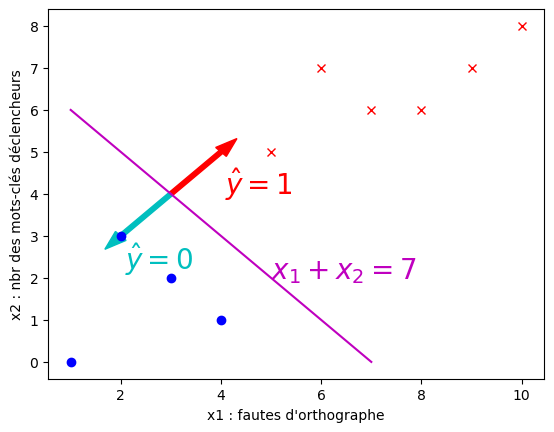

In [68]:
#X = df.iloc[:,:4].values

X1 = df.iloc[:,0].values #colonne des fautes d'orthographe 
X2 = df.iloc[:,1].values #colonne des nbr des mots-clés déclencheurs
Y = df.iloc[:,-1].values #colonne spam ou non spam

X1 = X1.reshape(len(X1),1) #redimenssionner X1 vers un vecteur colonne
X2 = X2.reshape(len(X2),1)

Y = Y.reshape(len(Y),1)

X11 = X1[Y == 1]#Contient que les X1 dont y == 1
X12 = X1[Y == 0]#Contient que les X1 dont y == 0
X21 = X2[Y == 1]#Contient que les X2 dont y == 1
X22 = X2[Y == 0]#Contient que les X2 dont y == 0

#y = y.reshape(len(y),1)
#plt.title('Spam ou Non Spam')

plt.xlabel("x1 : fautes d'orthographe")
plt.ylabel("x2 : nbr des mots-clés déclencheurs")

plt.plot(X11, X21, 'xr')
plt.plot(X12, X22, 'ob')
x = np.linspace(1,7)
y = -x + 7
plt.text(5,2, '$x_1 + x_2 = 7$', color = 'm',fontsize = 20)
plt.text(3, 4, "$ ~~~~~~ \\hat{y} = 1$", color = 'r',fontsize = 20)
plt.arrow(3,4,1,1,width=0.1,edgecolor='red', facecolor='red')
plt.text(1, 2.2, "$ ~~~~~~ \\hat{y} = 0$", color = 'c', fontsize = 20)
plt.arrow(3,4,-1,-1,width=0.1,edgecolor='c', facecolor='c')
plt.plot(x, y, 'm')

In [72]:
theta = np.random.randn(3, 1)
theta

array([[ 0.61550307],
       [-2.19380046],
       [ 0.21855594]])

### Modèle G(X) sous forme d'une fonction de Sigmoide : $G(X) = \frac{1}{1+e^{-X.\theta}}$

In [73]:
def G(X, theta):
    return 1/(1+np.e**(-(X.dot(theta))))

### Fonction de cout : $J(\theta) = \frac{-1}{m}\sum_{i=1}^{m}(y\times log(g(X.\theta))+(1-y)\times log(1-g(X.\theta))$

In [74]:
def fonctionCout(X, Y, theta):
    m = len(X)
    #J = -1/m*np.sum(Y.dot(np.log(G(X,theta)))+(1-Y).dot(log(1-G(X,theta))))
    J = -1/m*np.sum(Y*(np.log(G(X,theta)))+(1-Y)*(np.log(1-G(X,theta))))
    return J

### Gradient : $\frac{d(J(\theta))}{d\theta} = \frac{1}{m}X^T.(g(X.\theta) - y)$

In [75]:
def gradient(X, Y, theta):
    m = len(X)
    dJ_dtheta = 1/m * X.T.dot(G(X, theta) - Y)
    return dJ_dtheta

### Algorithme de Gradient Descent

In [76]:
def gradientDescent(X, Y, theta, alpha=0.1, iterations=1000): #alpha=0.01, iterations=2000
    for i in range(iterations):
        theta -= alpha*gradient(X, Y, theta)
        #print(theta)
    return theta

In [77]:
gradientDescent(X, Y, theta)

array([[ 0.30551919],
       [ 1.12021534],
       [-5.18416558]])

### Affichage de la frontière de décision
### Lorsque $G(X) = a_1 \times x_1 + a_2 \times x_2 + b = 0$
### càd $x_2 = - \frac{a_1}{a_2} \times x_1   - \frac{b}{a_2}$ 
avec $a_1 = \theta[0]$, $a_2 = \theta[1]$ et $b = \theta[2]$

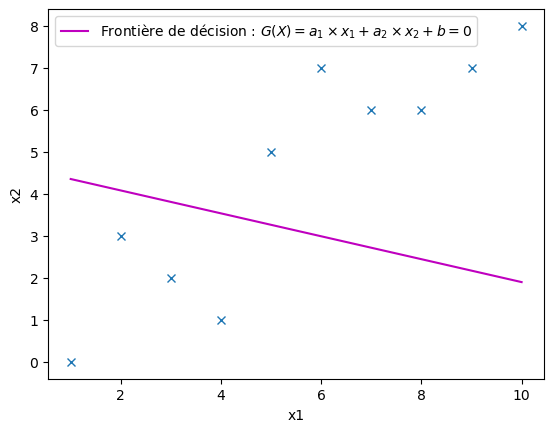

In [78]:
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(X1, X2, 'x')
plt.plot(X[:, 0], -theta[0]*X[:, 0]/theta[1] - theta[2]/theta[1], 
         label = 'Frontière de décision : $G(X) = a_1 \\times x_1 + a_2 \\times x_2 + b = 0$', color='m')
plt.legend()
#plot_x = np.array([min(X[:, 0]), max(X[:, 0])])

### Prédiction
### Exp1 :
email1 : fautes d'orthographe = 6 	nbr des mots-clés déclencheurs = 6

### Prédiction :
<b>Spam, proche de 1</b>

### Exp2 :
email2 : fautes d'orthographe = 1 	nbr des mots-clés déclencheurs = 1

### Prédiction :
<b>Non spam, proche de 0</b>

In [79]:
G(np.array([6, 6, 1]), theta) #proche de 1

array([0.96676145])

In [80]:
G(np.array([1, 1, 1]), theta) #proche de 0

array([0.02278886])

### Courbe d'apprentissage 

In [81]:
def gradientDescent_(X, Y, theta, alpha=0.1, iterations=1000):
    thetaHistoire = np.zeros((iterations, 3))
    coutHistoire = np.zeros(iterations)
    for i in range(iterations):
        theta -= alpha*gradient(X, Y, theta)
        thetaHistoire[i,:] = theta.T
        coutHistoire[i] = fonctionCout(X, Y, theta)
    return theta, thetaHistoire, coutHistoire

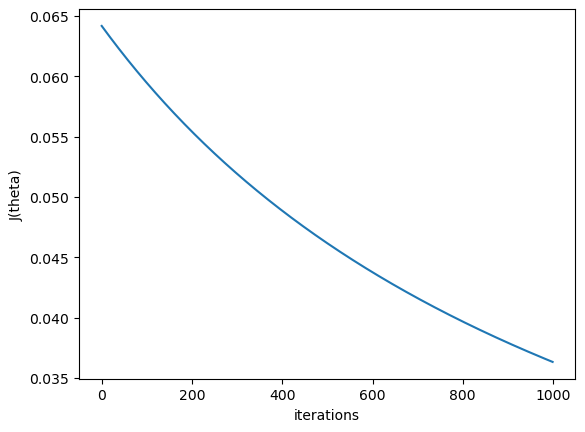

In [82]:
#visualisation des courbes d'apprentissage
iterations=1000
theta, thetaHistoire, coutHistoire = gradientDescent_(X, Y, theta)
#plt.figure(figsize = (15, 15))

#plt.subplots(figsize=(15,10)plt.title('Fonction de coût')
plt.xlabel('iterations')
plt.ylabel('J(theta)')
plt.plot(range(iterations), coutHistoire)